<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [1]:
! nvidia-smi
! pip install min-dalle

Mon Jul 11 16:30:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Load Model
`float32` is faster than `float16` but uses more GPU memory.  Change the `grid_size` to 3 or less if using `float32`.

In [2]:
dtype = "float16" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    is_mega=True, 
    is_reusable=True
)

downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  Reduce this if you run out of GPU memory.

- `intermediate_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

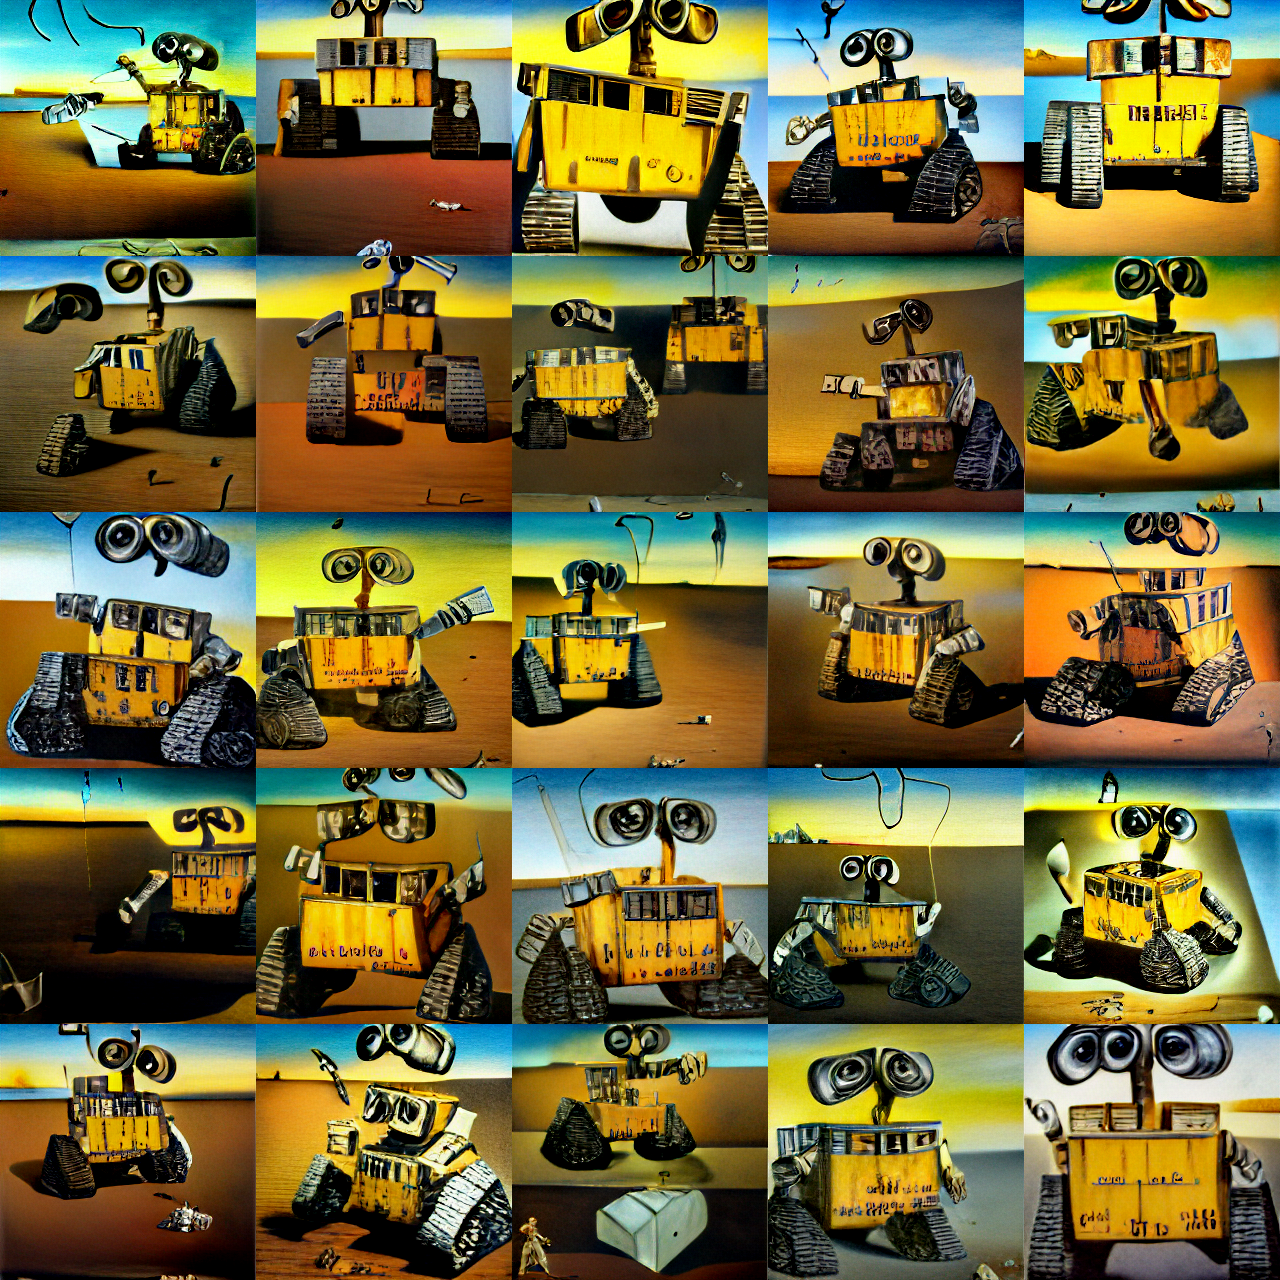

CPU times: user 1min 22s, sys: 2.91 s, total: 1min 25s
Wall time: 1min 28s


In [3]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
intermediate_outputs = True #@param {type:"boolean"}
grid_size = 5 #@param {type:"integer"}
log2_temperature = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
supercondition_factor = 16 #@param {type:"number"}
top_k = 256 #@param {type:"integer"}
log2_mid_count = 3 if intermediate_outputs else 0

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    log2_mid_count=log2_mid_count,
    temperature=2 ** log2_temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False